In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
#import torch
import wplotlib

The original network was trained by basicRegression.py<br>
here we load the trained network and use it

In [4]:
net = wuml.load_torch_network('./basicRegressionNet.pk')
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
Ŷ = net(data)

Check out our predictions

In [5]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
SR.true_vs_predict(print_out=True)

,y,ŷ,Δy
0,1.1,1.117,0.017
1,1.1,1.607,0.507
2,2.2,1.607,0.593
3,1.0,2.152,1.152
4,2.0,2.152,0.152
5,3.0,2.152,0.848
6,2.0,2.900,0.900
7,3.0,2.900,0.100
8,4.0,2.900,1.100


     y      ŷ     Δy
0  1.1  1.117  0.017
1  1.1  1.607  0.507
2  2.2  1.607  0.593
3  1.0  2.152  1.152
4  2.0  2.152  0.152
5  3.0  2.152  0.848
6  2.0  2.900  0.900
7  3.0  2.900  0.100
8  4.0  2.900  1.100

Draw the regression line

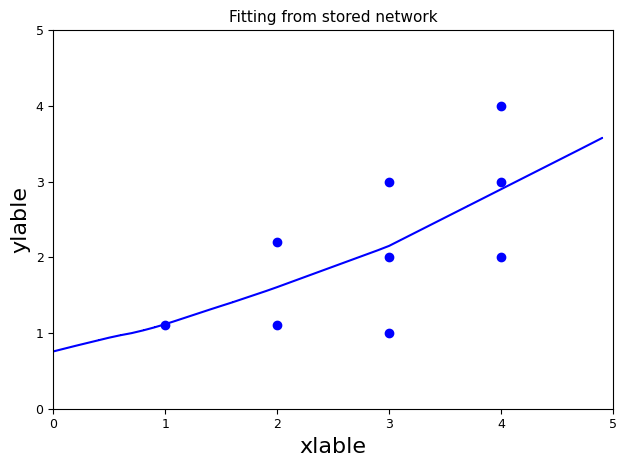

In [6]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = net(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='Fitting from stored network', xlim=[0,5], ylim=[0,5], show=True)	